<a href="https://colab.research.google.com/github/rsha0812/EVA-4-S10/blob/master/EVA4S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from datafile import *
from model import *
from lr_finder import *
from MissClassifiedImage import *
from GradCam import *
import torch.nn as nn
import torch.nn.functional as F
from trainingfile import *

# Data Loader

In [2]:
trainloader, testloader, classes = getData()

Files already downloaded and verified
Files already downloaded and verified


# Device

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

cuda


# Model Summary

In [4]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

# LR_Finder


Learning rate search finished. See the graph with {finder_name}.plot()


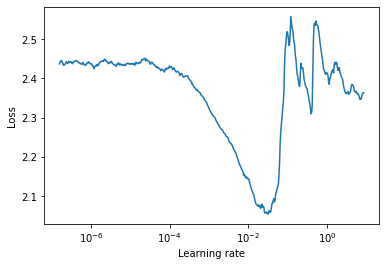

In [5]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=500)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()

# Execution(Train/Test Accuracy for 50 Epochs)

In [6]:
Training(50, model, device, trainloader, testloader)
ClassTestAccuracy(testloader, device, model, classes)

  0%|          | 0/500 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.5798362493515015 Batch_id=499 Accuracy=37.14: 100%|██████████| 500/500 [01:08<00:00,  7.34it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -2.5090, Accuracy: 4824/10000 (48.24%)

EPOCH: 1


Loss=1.3349735736846924 Batch_id=499 Accuracy=50.39: 100%|██████████| 500/500 [01:08<00:00,  7.29it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -3.7021, Accuracy: 5504/10000 (55.04%)

EPOCH: 2


Loss=1.041895866394043 Batch_id=499 Accuracy=56.89: 100%|██████████| 500/500 [01:08<00:00,  7.29it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -4.0740, Accuracy: 6231/10000 (62.31%)

EPOCH: 3


Loss=1.1181914806365967 Batch_id=499 Accuracy=61.96: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -4.5300, Accuracy: 6599/10000 (65.99%)

EPOCH: 4


Loss=0.9982278943061829 Batch_id=499 Accuracy=65.05: 100%|██████████| 500/500 [01:08<00:00,  7.31it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -4.8808, Accuracy: 6977/10000 (69.77%)

EPOCH: 5


Loss=0.8992739915847778 Batch_id=499 Accuracy=67.74: 100%|██████████| 500/500 [01:09<00:00,  7.22it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -5.1960, Accuracy: 7005/10000 (70.05%)

EPOCH: 6


Loss=0.8382241129875183 Batch_id=499 Accuracy=70.33: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -5.7868, Accuracy: 7295/10000 (72.95%)

EPOCH: 7


Loss=1.1099178791046143 Batch_id=499 Accuracy=72.08: 100%|██████████| 500/500 [01:08<00:00,  7.30it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -6.6209, Accuracy: 7440/10000 (74.40%)

EPOCH: 8


Loss=0.8735960125923157 Batch_id=499 Accuracy=73.08: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -6.6432, Accuracy: 7345/10000 (73.45%)

EPOCH: 9


Loss=0.7088176012039185 Batch_id=499 Accuracy=74.56: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -6.6068, Accuracy: 7734/10000 (77.34%)

EPOCH: 10


Loss=0.5661969184875488 Batch_id=499 Accuracy=75.54: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -7.2648, Accuracy: 7706/10000 (77.06%)

EPOCH: 11


Loss=0.6732199788093567 Batch_id=499 Accuracy=76.89: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -7.2502, Accuracy: 7761/10000 (77.61%)

EPOCH: 12


Loss=0.5730845332145691 Batch_id=499 Accuracy=77.93: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -7.9615, Accuracy: 7887/10000 (78.87%)

EPOCH: 13


Loss=0.7464690208435059 Batch_id=499 Accuracy=78.75: 100%|██████████| 500/500 [01:08<00:00,  7.30it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.2723, Accuracy: 7945/10000 (79.45%)

EPOCH: 14


Loss=0.5973787903785706 Batch_id=499 Accuracy=79.52: 100%|██████████| 500/500 [01:08<00:00,  7.29it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.1721, Accuracy: 8095/10000 (80.95%)

EPOCH: 15


Loss=0.565056562423706 Batch_id=499 Accuracy=80.19: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.4097, Accuracy: 8225/10000 (82.25%)

EPOCH: 16


Loss=0.5203266739845276 Batch_id=499 Accuracy=80.72: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.3631, Accuracy: 8264/10000 (82.64%)

EPOCH: 17


Loss=0.40372100472450256 Batch_id=499 Accuracy=81.58: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.1971, Accuracy: 8093/10000 (80.93%)

EPOCH: 18


Loss=0.5777127742767334 Batch_id=499 Accuracy=81.73: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.9536, Accuracy: 8256/10000 (82.56%)

EPOCH: 19


Loss=0.5375790596008301 Batch_id=499 Accuracy=82.33: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -9.5227, Accuracy: 8247/10000 (82.47%)

EPOCH: 20


Loss=0.4759658873081207 Batch_id=499 Accuracy=83.03: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -8.5916, Accuracy: 8343/10000 (83.43%)

EPOCH: 21


Loss=0.5684741139411926 Batch_id=499 Accuracy=83.29: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -9.2548, Accuracy: 8462/10000 (84.62%)

EPOCH: 22


Loss=0.47696158289909363 Batch_id=499 Accuracy=83.84: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -9.3336, Accuracy: 8325/10000 (83.25%)

EPOCH: 23


Loss=0.3967694044113159 Batch_id=499 Accuracy=84.29: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -9.8413, Accuracy: 8370/10000 (83.70%)

EPOCH: 24


Loss=0.3789813220500946 Batch_id=499 Accuracy=84.70: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.3398, Accuracy: 8564/10000 (85.64%)

EPOCH: 25


Loss=0.5024011731147766 Batch_id=499 Accuracy=84.91: 100%|██████████| 500/500 [01:08<00:00,  7.26it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.1535, Accuracy: 8522/10000 (85.22%)

EPOCH: 26


Loss=0.3647538423538208 Batch_id=499 Accuracy=85.64: 100%|██████████| 500/500 [01:09<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.4303, Accuracy: 8564/10000 (85.64%)

EPOCH: 27


Loss=0.4694221615791321 Batch_id=499 Accuracy=85.76: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.7465, Accuracy: 8597/10000 (85.97%)

EPOCH: 28


Loss=0.33689624071121216 Batch_id=499 Accuracy=86.09: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.6220, Accuracy: 8557/10000 (85.57%)

EPOCH: 29


Loss=0.39186882972717285 Batch_id=499 Accuracy=86.67: 100%|██████████| 500/500 [01:08<00:00,  7.26it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.9195, Accuracy: 8646/10000 (86.46%)

EPOCH: 30


Loss=0.27329203486442566 Batch_id=499 Accuracy=86.93: 100%|██████████| 500/500 [01:08<00:00,  7.26it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.1761, Accuracy: 8585/10000 (85.85%)

EPOCH: 31


Loss=0.30609872937202454 Batch_id=499 Accuracy=86.83: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -10.5218, Accuracy: 8636/10000 (86.36%)

EPOCH: 32


Loss=0.4219774603843689 Batch_id=499 Accuracy=87.39: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.3321, Accuracy: 8600/10000 (86.00%)

EPOCH: 33


Loss=0.6393417119979858 Batch_id=499 Accuracy=87.47: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.5796, Accuracy: 8628/10000 (86.28%)

EPOCH: 34


Loss=0.38874560594558716 Batch_id=499 Accuracy=87.72: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.6313, Accuracy: 8650/10000 (86.50%)

EPOCH: 35


Loss=0.32632774114608765 Batch_id=499 Accuracy=87.88: 100%|██████████| 500/500 [01:09<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.6798, Accuracy: 8608/10000 (86.08%)

EPOCH: 36


Loss=0.2989976406097412 Batch_id=499 Accuracy=88.34: 100%|██████████| 500/500 [01:09<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.6193, Accuracy: 8708/10000 (87.08%)

EPOCH: 37


Loss=0.27434229850769043 Batch_id=499 Accuracy=88.52: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.7698, Accuracy: 8690/10000 (86.90%)

EPOCH: 38


Loss=0.30639001727104187 Batch_id=499 Accuracy=88.56: 100%|██████████| 500/500 [01:08<00:00,  7.26it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -11.6969, Accuracy: 8742/10000 (87.42%)

EPOCH: 39


Loss=0.30961495637893677 Batch_id=499 Accuracy=88.94: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.1039, Accuracy: 8736/10000 (87.36%)

EPOCH: 40


Loss=0.31167319416999817 Batch_id=499 Accuracy=89.25: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.6448, Accuracy: 8582/10000 (85.82%)

EPOCH: 41


Loss=0.404977411031723 Batch_id=499 Accuracy=89.17: 100%|██████████| 500/500 [01:08<00:00,  7.27it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.4256, Accuracy: 8775/10000 (87.75%)

EPOCH: 42


Loss=0.268286794424057 Batch_id=499 Accuracy=89.67: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.1087, Accuracy: 8648/10000 (86.48%)

EPOCH: 43


Loss=0.3849834203720093 Batch_id=499 Accuracy=89.82: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.8327, Accuracy: 8797/10000 (87.97%)

EPOCH: 44


Loss=0.31111854314804077 Batch_id=499 Accuracy=89.65: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.3127, Accuracy: 8640/10000 (86.40%)

EPOCH: 45


Loss=0.3152998387813568 Batch_id=499 Accuracy=90.08: 100%|██████████| 500/500 [01:08<00:00,  7.28it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -13.2324, Accuracy: 8767/10000 (87.67%)

EPOCH: 46


Loss=0.43094223737716675 Batch_id=499 Accuracy=90.29: 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -13.4959, Accuracy: 8750/10000 (87.50%)

EPOCH: 47


Loss=0.33891910314559937 Batch_id=499 Accuracy=90.21: 100%|██████████| 500/500 [01:09<00:00,  7.25it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -13.4388, Accuracy: 8800/10000 (88.00%)

EPOCH: 48


Loss=0.44503718614578247 Batch_id=499 Accuracy=90.60: 100%|██████████| 500/500 [01:09<00:00,  7.23it/s]
  0%|          | 0/500 [00:00<?, ?it/s]


Test set: Average loss: -12.8737, Accuracy: 8719/10000 (87.19%)

EPOCH: 49


Loss=0.22928780317306519 Batch_id=499 Accuracy=90.71: 100%|██████████| 500/500 [01:08<00:00,  7.25it/s]



Test set: Average loss: -13.4302, Accuracy: 8820/10000 (88.20%)



IndexError: ignored

# Training Images

 frog horse  frog   dog


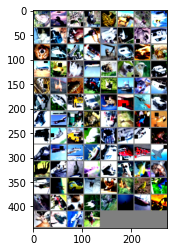

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Misclassified Image and GradCam

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


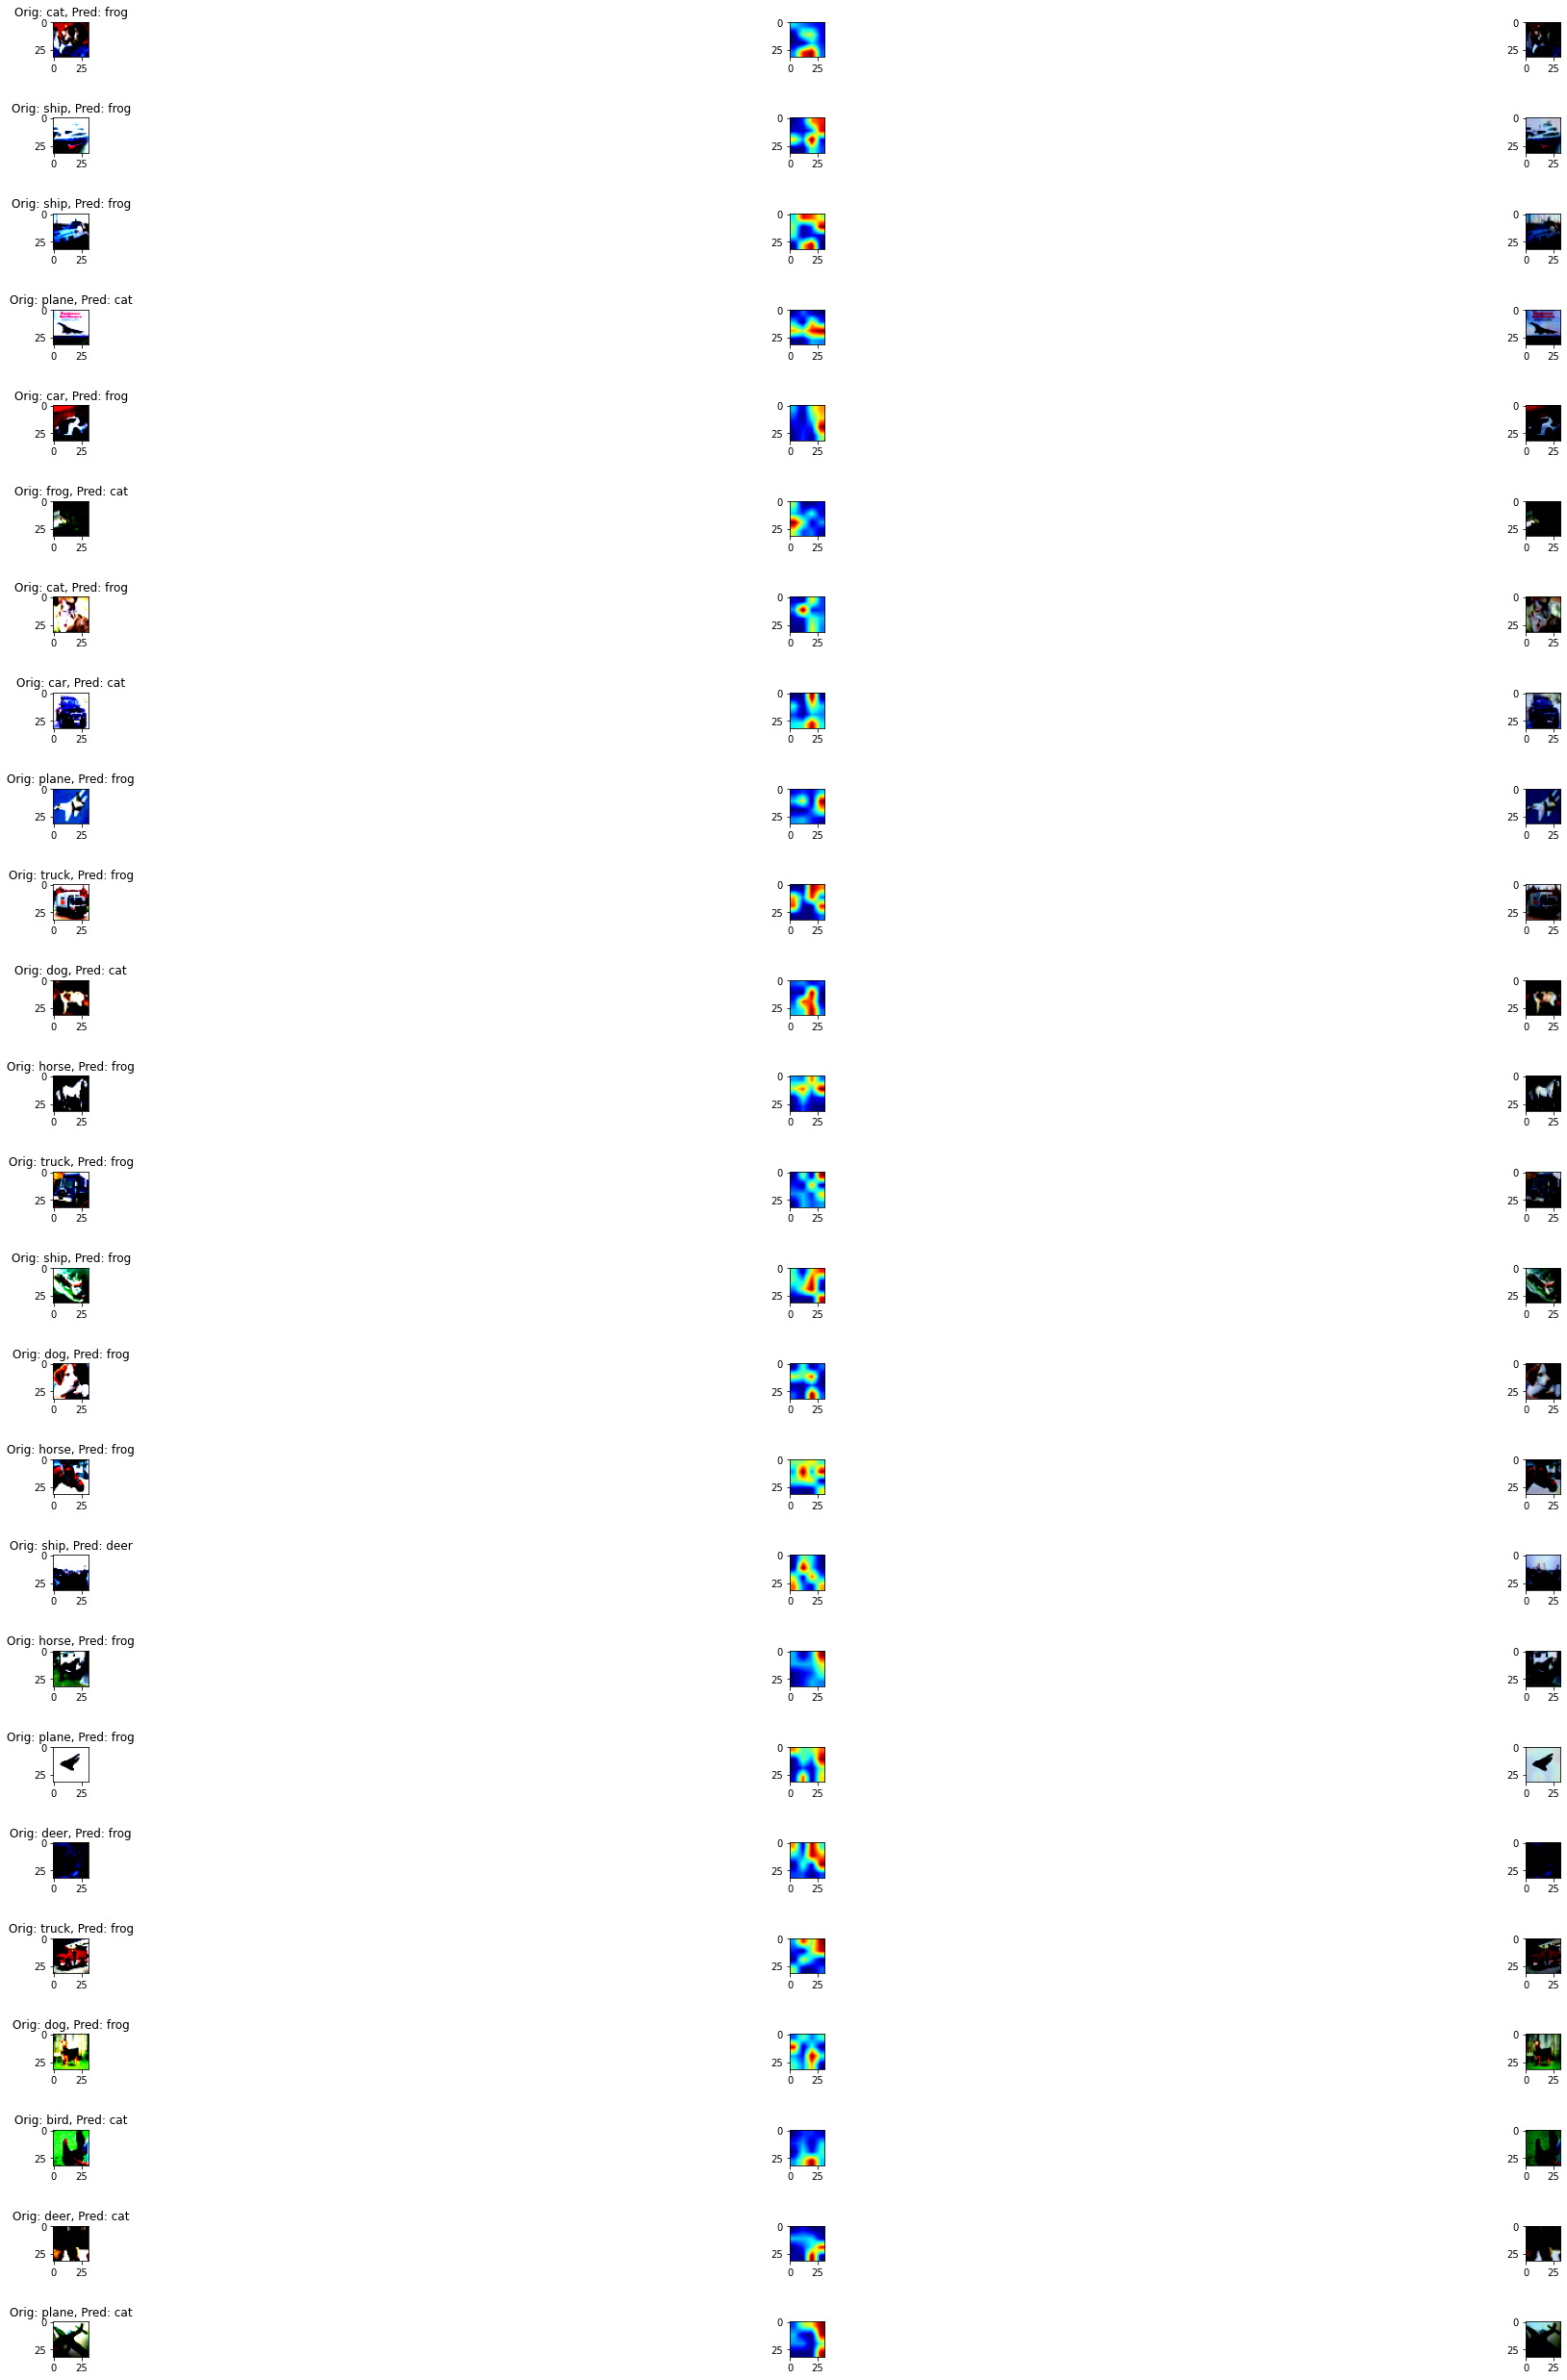

In [8]:
model =ResNet18()
MissClassifedImage(testloader, model,classes)

# Graph

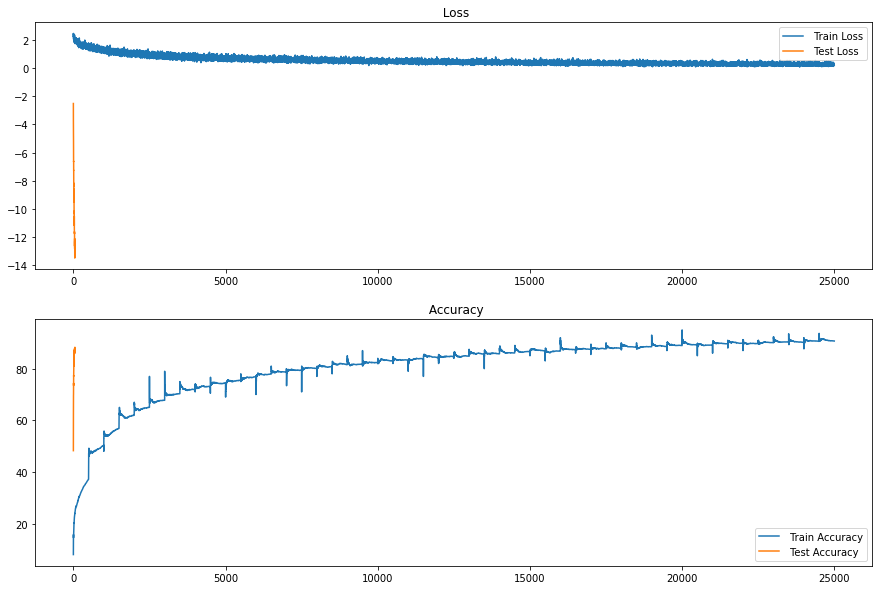

In [9]:
plotPerformanceGraph( )